# Imports

In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path("figure_supplementary.ipynb").resolve().parents[1]))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.transforms as mtransforms
import os

import bb_rhythm.plotting
import bb_rhythm.rhythm

import path_settings

In [48]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                            'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# Data

In [4]:
# cosinor fit data for period 2016
cosinor_df_2016 = pd.read_csv(path_settings.COSINOR_DF_PATH_2016)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2016["is_circadian"] = cosinor_df_2016.p_value < 0.05

In [36]:
# cosinor fit data for period 2019
cosinor_df_2019 = pd.read_csv(path_settings.COSINOR_DF_PATH_2019)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2019["is_circadian"] = cosinor_df_2019.p_value < 0.05

## Number of bees

In [53]:
palette = sns.color_palette()

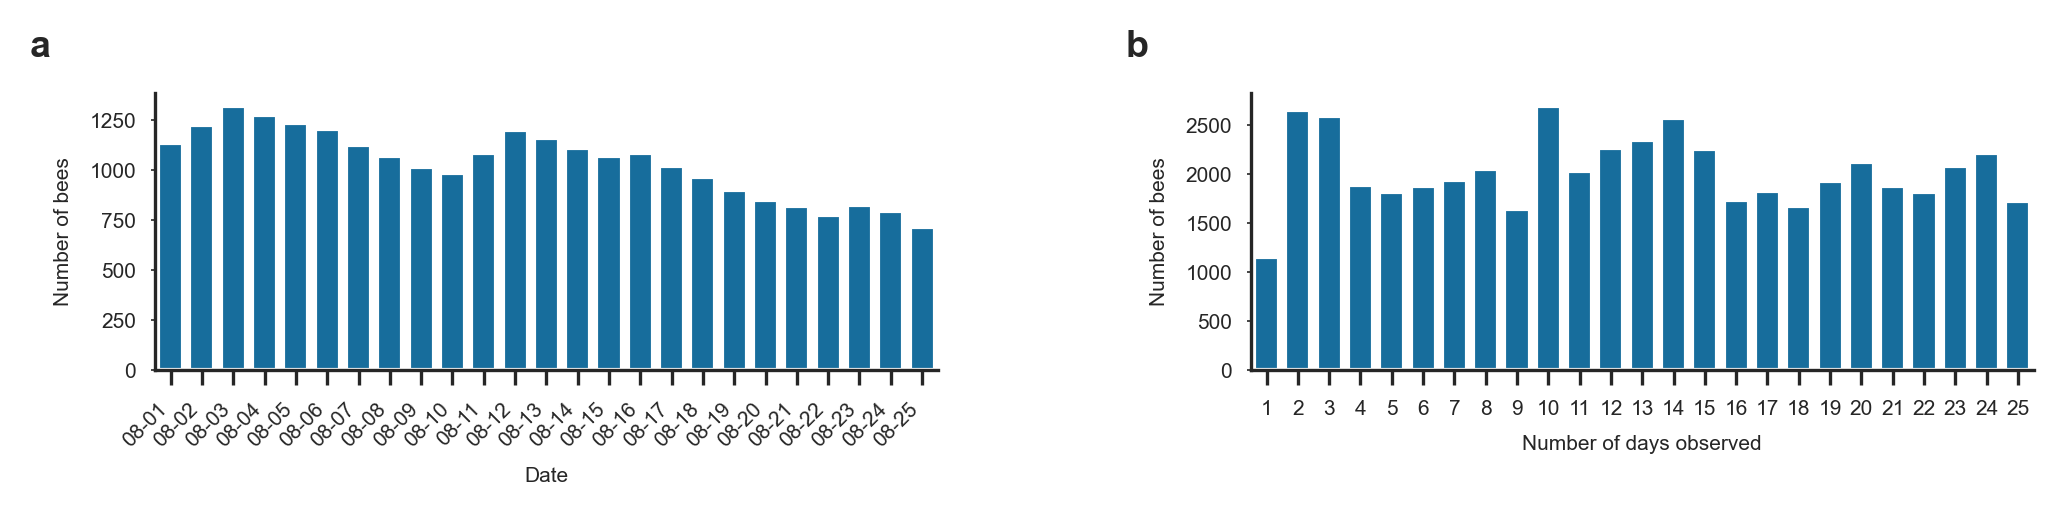

In [56]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(8.08, 1.2), dpi=300, gridspec_kw={'wspace': 0.4})

# plot number of bees per day
sns.barplot(data=cosinor_df_2016, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
axs[0].set_xticks(axs[0].get_xticks())
x_dates = cosinor_df_2016.date.dt.strftime('%m-%d').sort_values().unique()
axs[0].set_xticklabels(x_dates, rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2016.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2016_app.png"), bbox_inches="tight")

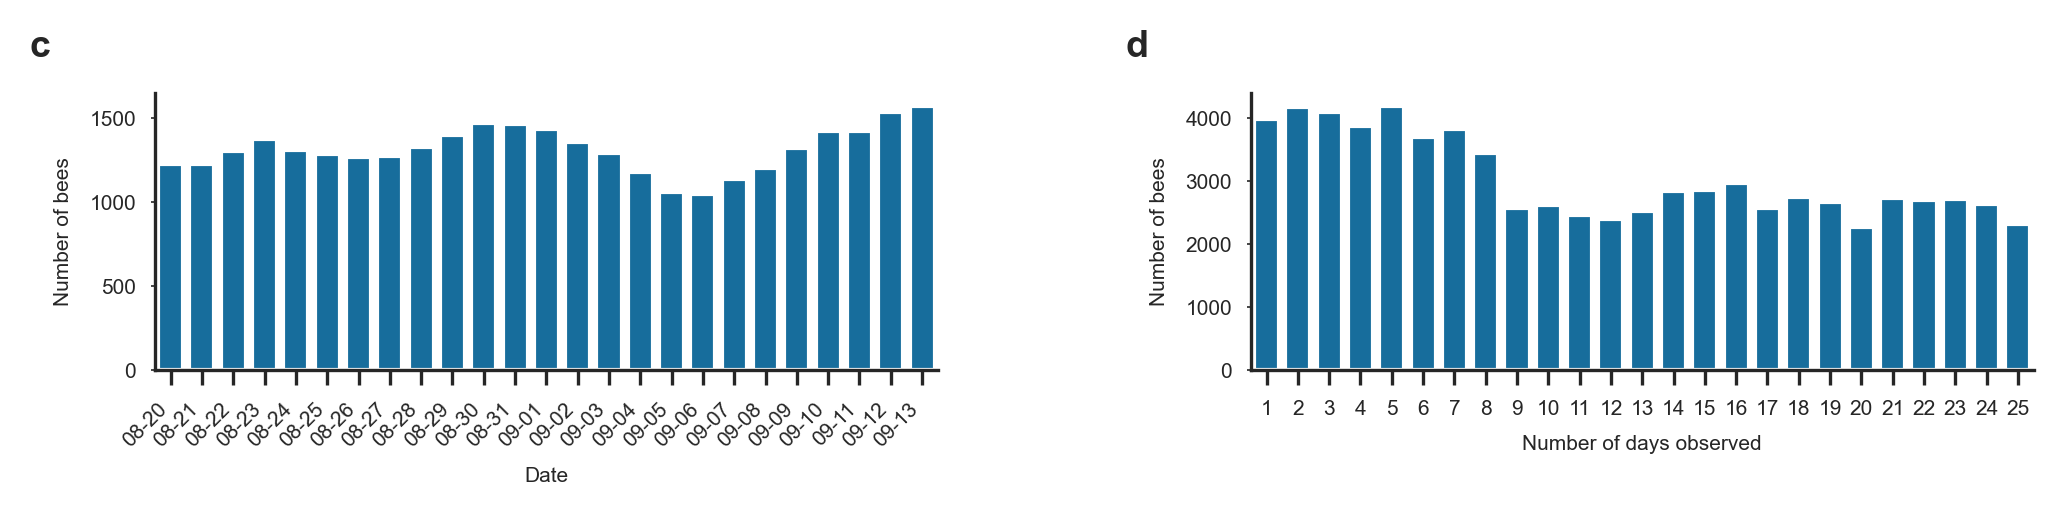

In [52]:
# create figure
fig, axs = plt.subplots(1, 2, figsize=(8.08, 1.2), dpi=300, gridspec_kw={'wspace': 0.4})

# plot number of bees per day
cosinor_df_2019.date = pd.to_datetime(cosinor_df_2019.date)
sns.barplot(data=cosinor_df_2019, x="date", y="bee_id", ax=axs[0], estimator="count", errorbar=None, color=palette[0])
axs[0].set(xlabel="Date", ylabel="Number of bees")
axs[0].set_xticks(axs[0].get_xticks())
x_dates = cosinor_df_2019.date.dt.strftime('%m-%d').sort_values().unique()
axs[0].set_xticklabels(x_dates, rotation=45, ha='right')
sns.despine(ax=axs[0])

# plot how many bees have been observed how many dates
sns.barplot(data=cosinor_df_2019.groupby("bee_id")["date"].count().reset_index(), y="bee_id", x="date", ax=axs[1], errorbar=None, color=palette[0])
axs[1].set(xlabel="Number of days observed", ylabel="Number of bees")
sns.despine(ax=axs[1])

# label subplots
labels=["c", "d"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1

# save fig
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "number_of_bees_2019_app.png"), bbox_inches="tight")

## Share of rhythmic bees per age

In [57]:
# bar plot dataframe
df_bar_2016 = cosinor_df_2016.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

df_bar_2019 = cosinor_df_2019.groupby(["age"]).agg(
    no=("is_circadian", lambda x: 100),
    yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

In [58]:
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_bar_2016["age"].unique()), "age", df_bar_2016
    )

/tmp/ipykernel_5909/1613457338.py:20: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
/tmp/ipykernel_5909/1613457338.py:21: UserWarning: The palette list has more values (58) than needed (48), which may not be intended.
  sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")


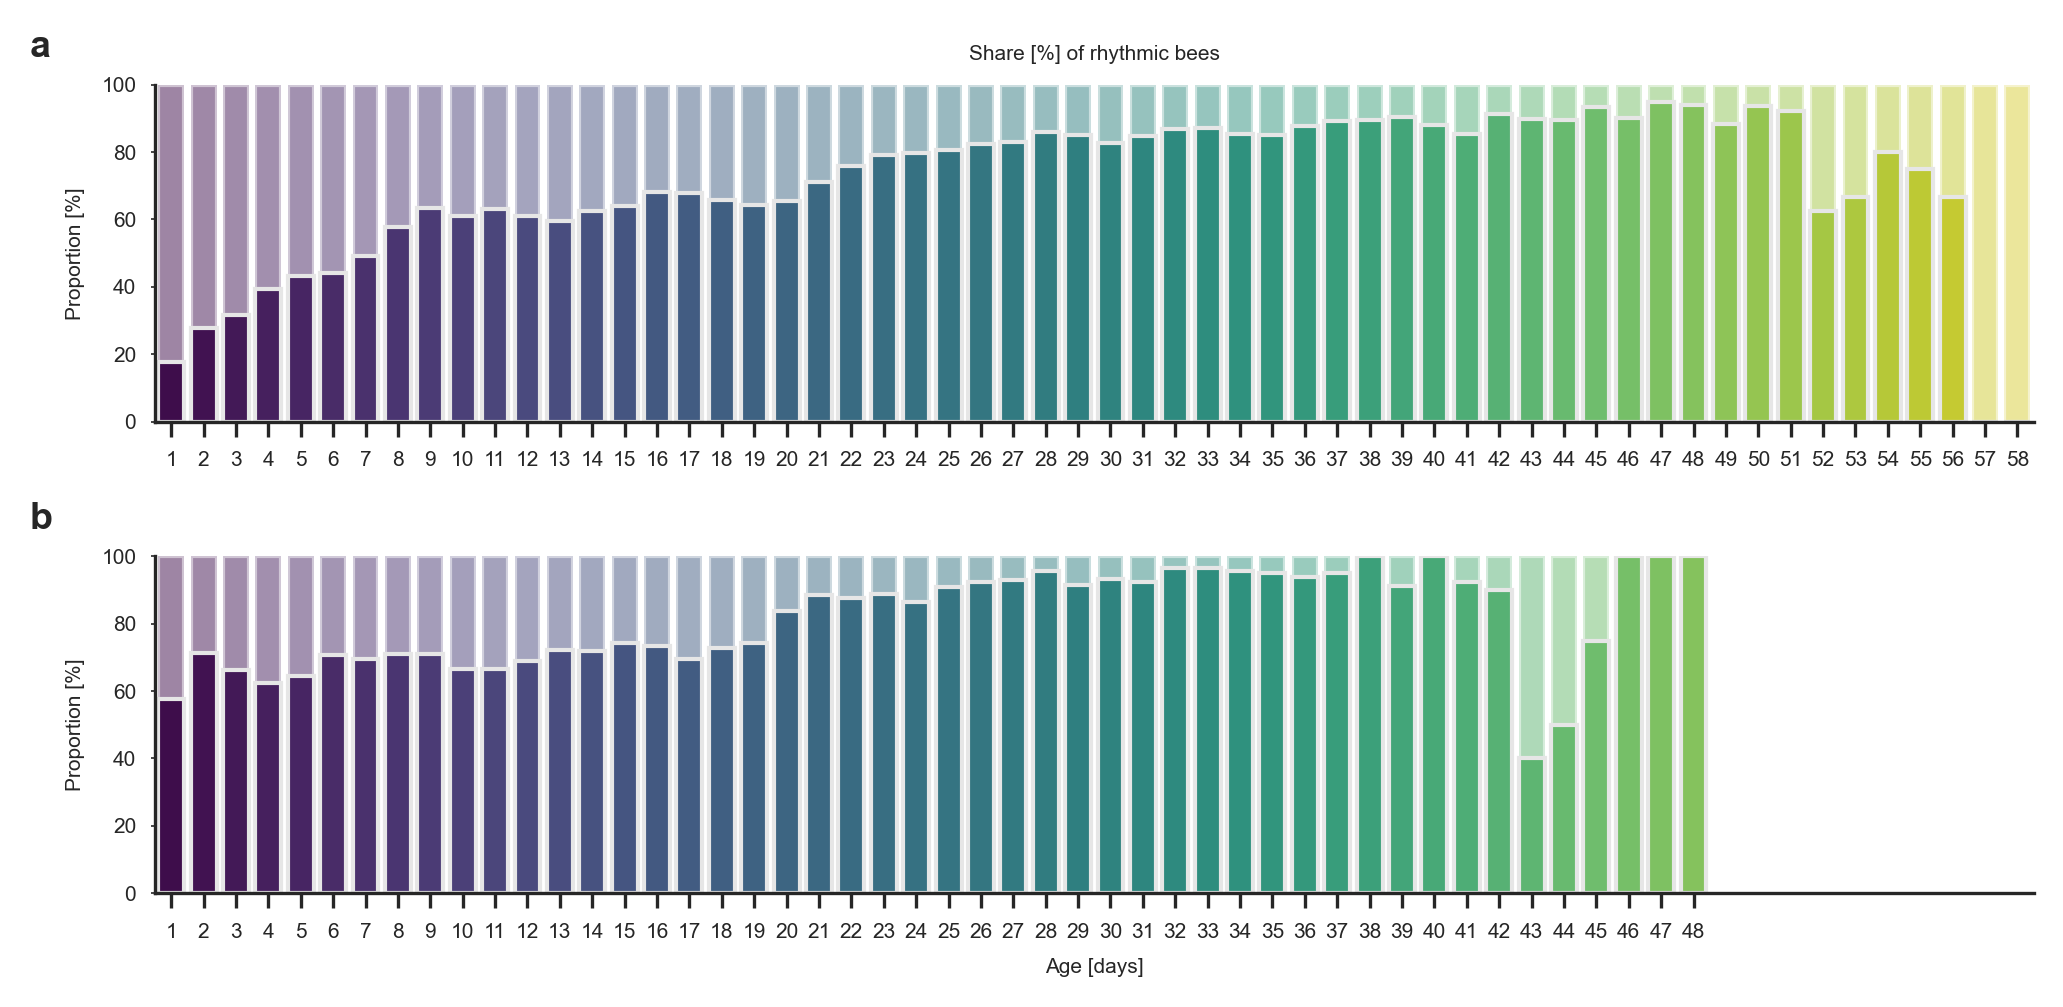

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(8.08, 3.5), dpi=300, gridspec_kw={'hspace': 0.4}, sharey=True)

# barplot
sns.barplot(data=df_bar_2016, x="age", y="Non-circadian", ax=axs[0], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2016, x="age", y="Circadian", ax=axs[0], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[0].set_xlabel("")

# y-axis settings
axs[0].set_ylabel("Proportion [%]")
axs[0].set_ylim(0, 100.0)

# figure settings
axs[0].set_title("Share [%] of rhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs[0])
axs[0].grid(False)

# barplot
sns.barplot(data=df_bar_2019, x="age", y="Non-circadian", ax=axs[1], hue="age", legend=False, palette=palette, alpha=0.5, orient="v")
sns.barplot(data=df_bar_2019, x="age", y="Circadian", ax=axs[1], hue="age", legend=False, palette=palette, orient="v", edgecolor=".9")

# x-axis settings
axs[1].set_xlabel("Age [days]")
axs[1].set_xlim(-0.5, 57.5)

# y-axis settings
axs[1].set_ylabel("Proportion [%]")
axs[1].set_ylim(0, 100.0)

# figure settings
sns.despine(ax=axs[1])
axs[1].grid(False)

# add subplot labels
labels=["a", "b"]
i = 0
for ax in axs.reshape(-1):
    trans = mtransforms.ScaledTranslation(-30/72, 5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, labels[i], transform=ax.transAxes + trans,
            fontsize='9', va='bottom', fontfamily='Arial', fontweight='bold')
    i += 1
    
# save fig
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "share_of_rhythmic_bees_app.png"), bbox_inches="tight")

## Rebuttal Analyses

### Spectrogramms for different age groups

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/mean_velocity_2019.csv", parse_dates=["date"])

df['date'] = pd.to_datetime(df['date'])
age_bins = pd.qcut(df['age'], 3, labels=["0 - 12 Days", "12 - 24 Days", "24 - 48 Days"])
df['age_bin'] = age_bins
grouped = df.groupby(['age_bin', "date"])["velocity"].mean().reset_index()

bin_labels = ["0 - 12 Days", "12 - 24 Days", "24 - 48 Days"]

plt.figure(figsize=(10, 6))
ymax_total = 0  # For annotation

for i, bin_label in enumerate(bin_labels):
    bin_df = grouped[grouped['age_bin'] == bin_label].sort_values('date')
    bin_df = bin_df.drop_duplicates(subset='date')
    if bin_df['date'].nunique() < 2:
        print(f"Skipping bin {bin_label}: not enough unique timestamps.")
        continue

    velocities = bin_df['velocity'].to_numpy()
    times = bin_df['date'].to_numpy()

    dt_hours = np.median(np.diff(bin_df['date']).astype('timedelta64[s]').astype(float)) / 3600
    if dt_hours == 0 or np.isnan(dt_hours):
        print(f"Skipping bin {bin_label}: dt_hours is zero or NaN.")
        continue
    fs = 1 / dt_hours

    velocities = velocities[~np.isnan(velocities)]
    N = len(velocities)
    if N == 0:
        print(f"Skipping bin {bin_label}: no valid velocities.")
        continue

    freqs = np.fft.rfftfreq(N, d=1/fs)
    spectrum = np.abs(np.fft.rfft(velocities))
    with np.errstate(divide='ignore'):
        periods = 1 / freqs
    valid = freqs > 0

    color = sns.color_palette("crest", 3)[i]
    plt.plot(periods[valid], spectrum[valid], color=color, label=bin_label)
    ymax_total = max(ymax_total, np.max(spectrum[valid]))

plt.axvline(24, color='gray', linestyle='--')
plt.text(24, ymax_total * 0.95, '24h', color='gray', ha='right', va='top', rotation=0)
plt.xscale('log')
plt.ylabel('Magnitude')
plt.xlabel('Period [hours]')
plt.legend(title='Age Bin')
plt.tight_layout()
plt.show()

### Age distribution during day vs. night time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/interactions_side0_2019.csv", usecols=["bee_id0", "bee_id1", "interaction_start", "age_bee0", "age_bee1", "x_pos_start_bee0", "x_pos_start_bee1", "y_pos_start_bee0", "y_pos_start_bee1"], parse_dates=["interaction_start"])
df.head()

,bee_id0,bee_id1,interaction_start,x_pos_start_bee0,y_pos_start_bee0,x_pos_start_bee1,y_pos_start_bee1,age_bee0,age_bee1
0,2540.0,3036.0,2019-08-27 03:24:00.020246+00:00,53.4100,28.9561,54.4619,36.3934,12.0,6.0
1,2538.0,2558.0,2019-08-27 03:24:00.020246+00:00,44.9438,53.2660,52.3356,61.4632,11.0,12.0
2,2074.0,2558.0,2019-08-27 03:24:00.020246+00:00,59.6309,56.6406,52.3356,61.4632,14.0,12.0
3,1347.0,2558.0,2019-08-27 03:24:00.020246+00:00,54.2329,72.6049,52.3356,61.4632,24.0,12.0
4,2370.0,2489.0,2019-08-27 03:24:00.020246+00:00,69.3587,72.6218,74.6412,59.9120,12.0,12.0


In [3]:
comb_df = pd.DataFrame()
comb_df["bee_id"] = pd.concat([df["bee_id0"], df["bee_id1"]])
comb_df["age"] = pd.concat([df["age_bee0"], df["age_bee1"]])
comb_df["x_pos"] = pd.concat([df["x_pos_start_bee0"], df["x_pos_start_bee1"]]).round().astype(int)
comb_df["y_pos"] = pd.concat([df["y_pos_start_bee0"], df["y_pos_start_bee1"]]).round().astype(int)
comb_df["time"] = pd.concat([df["interaction_start"], df["interaction_start"]])
comb_df.head()


,bee_id,age,x_pos,y_pos,time
0,2540.0,12.0,53,29,2019-08-27 03:24:00.020246+00:00
1,2538.0,11.0,45,53,2019-08-27 03:24:00.020246+00:00
2,2074.0,14.0,60,57,2019-08-27 03:24:00.020246+00:00
3,1347.0,24.0,54,73,2019-08-27 03:24:00.020246+00:00
4,2370.0,12.0,69,73,2019-08-27 03:24:00.020246+00:00


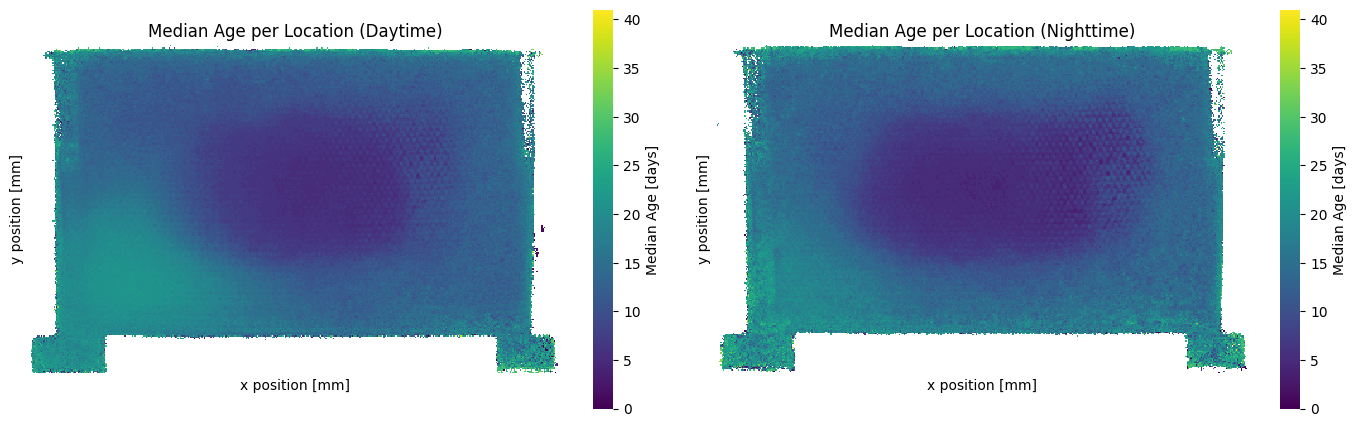

In [ ]:
def plot_median_age_heatmap(
    df,
    time_col: str = "time",
    age_col: str = "age",
    x_col: str = "x_pos",
    y_col: str = "y_pos",
    day_start: int = 6,
    day_end: int = 18,
) -> None:
    """
    Plots seaborn heatmaps of the median bee age per (x, y) location for daytime and nighttime.

    Parameters:
        df: pandas.DataFrame containing columns for bee_id, age, x_pos, y_pos, and time.
        time_col: Name of the column containing timestamps.
        age_col: Name of the column containing age.
        x_col, y_col: Names of the columns containing x and y positions.
        day_start: Hour (inclusive) when daytime starts (default: 6).
        day_end: Hour (exclusive) when daytime ends (default: 18).
    """
    df[time_col] = pd.to_datetime(df[time_col])

    df["hour"] = df[time_col].dt.hour
    df["period"] = np.where((df["hour"] >= day_start) & (df["hour"] < day_end), "Daytime", "Nighttime")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
    for i, period in enumerate(["Daytime", "Nighttime"]):
        sub = df[df["period"] == period]
        medians = pd.pivot_table(data=sub, index=y_col, columns=x_col, values=age_col, aggfunc="median")
        sns.heatmap(
            medians,
            ax=axes[i],
            cmap="viridis",
            cbar=True,
            square=True,
            cbar_kws={"label": "Median Age [days]", "shrink": 0.7},
            vmin=0,
            vmax=41,
        )
        axes[i].set_title(f"Median Age per Location ({period})")
        axes[i].set_xlabel("x position [mm]")
        axes[i].set_ylabel("y position [mm]")
        axes[i].tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.tight_layout()
    plt.show()


plot_median_age_heatmap(comb_df)

### Linear Model for Speed Transfer Hypothesis

In [ ]:
import pandas as pd
from bb_rhythm.interactions import filter_overlap, get_start_velocity

df = pd.read_csv(
    "../data/interactions_side0_2019.csv",
    usecols=["vel_change_bee0", "rel_change_bee0", "vel_change_bee1", "rel_change_bee1", "overlapping"],
)
df = filter_overlap(df)
df.drop(columns=["overlapping"], inplace=True)
df = df.rename(
    columns={
        "vel_change_bee0": "vel_change_bee_focal",
        "rel_change_bee0": "rel_change_bee_focal",
        "vel_change_bee1": "vel_change_bee_non_focal",
        "rel_change_bee1": "rel_change_bee_non_focal",
    }
)
get_start_velocity(df)
df['start_diff'] = df.velocity_start_non_focal - df.velocity_start_focal # >0 means non-focal was faster at the start
df.drop(columns=["vel_change_bee_non_focal", "rel_change_bee_non_focal", "rel_change_bee_focal", "velocity_start_non_focal", "velocity_start_focal"], inplace=True)
df = df.dropna(subset=['start_diff', 'vel_change_bee_focal'])
df

,vel_change_bee_focal,start_diff
0,0.106241,1.070745
2,1.837692,-1.179891
3,-1.808310,-0.825187
7,0.426386,0.778804
9,0.397959,0.344263
...,...,...
84825616,-0.673462,-2.515058
84825634,0.197626,5.364486
84825654,-0.958832,-2.494193
84825668,0.614591,0.139106


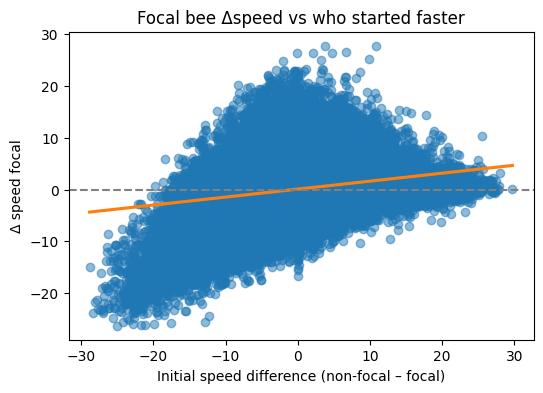

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.regplot(x='start_diff', y='vel_change_bee_focal', data=df,
            scatter_kws={'alpha':.5}, line_kws={'color':'C1'})
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Initial speed difference (non-focal – focal)')
plt.ylabel('Δ speed focal')
plt.title('Focal bee Δspeed vs who started faster')
plt.show()

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['start_diff'])
y = df['vel_change_bee_focal']
ols = sm.OLS(y, X).fit()

# Get robust standard errors, t‐stats and p‐values inspite of heteroscedasticity
robust = ols.get_robustcov_results(cov_type='HC3')
print(robust.summary())

                             OLS Regression Results                             
Dep. Variable:     vel_change_bee_focal   R-squared:                       0.078
Model:                              OLS   Adj. R-squared:                  0.078
Method:                   Least Squares   F-statistic:                 4.211e+05
Date:                  Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                          17:44:10   Log-Likelihood:            -2.3883e+07
No. Observations:              13289384   AIC:                         4.777e+07
Df Residuals:                  13289382   BIC:                         4.777e+07
Df Model:                             1                                         
Covariance Type:                    HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0798      0.000

### Multiple Interactions during the Time Window

In [ ]:
from bb_rhythm.interactions import filter_overlap
import pandas as pd

df = pd.read_csv(
    "../data/interactions_side0_2019.csv",
    usecols=["bee_id0", "bee_id1", "interaction_start", "interaction_end", "overlapping"],
)
df = filter_overlap(df)
df.drop(columns=["overlapping"], inplace=True)
df

,bee_id0,bee_id1,interaction_start,interaction_end
0,2540.0,3036.0,2019-08-27 03:24:00.020246+00:00,2019-08-27 03:24:39.228585+00:00
2,2074.0,2558.0,2019-08-27 03:24:00.020246+00:00,2019-08-27 03:24:10.031020+00:00
3,1347.0,2558.0,2019-08-27 03:24:00.020246+00:00,2019-08-27 03:24:43.232360+00:00
7,1625.0,1849.0,2019-08-27 03:24:00.020246+00:00,2019-08-27 03:24:05.526296+00:00
9,2774.0,3018.0,2019-08-27 03:24:00.020246+00:00,2019-08-27 03:25:59.980319+00:00
...,...,...,...,...
84825665,1854.0,3159.0,2019-09-03 09:05:59.728209+00:00,2019-09-03 09:05:59.895050+00:00
84825666,2390.0,3453.0,2019-09-03 09:05:59.728209+00:00,2019-09-03 09:05:59.895050+00:00
84825667,2306.0,2390.0,2019-09-03 09:05:59.728209+00:00,2019-09-03 09:05:59.895050+00:00
84825668,1688.0,4097.0,2019-09-03 09:05:59.728209+00:00,2019-09-03 09:05:59.895050+00:00


In [ ]:
import numpy as np
import pandas as pd

df['interaction_start'] = pd.to_datetime(df['interaction_start'])

starts = df['interaction_start'].values.astype('datetime64[ns]')
sec    = starts.astype('int64') // 1_000_000_000 

idx_sorted = np.argsort(sec)
sec_sorted = sec[idx_sorted]
inverse    = np.empty_like(idx_sorted)
inverse[idx_sorted] = np.arange(len(sec))

window     = 30
left_idx   = np.searchsorted(sec_sorted, sec - window, side='left')
right_idx  = np.searchsorted(sec_sorted, sec + window, side='right')

total_counts = (right_idx - left_idx) - 1

df['neighbors_±30s'] = total_counts[inverse]

avg_neighbors = total_counts.mean()
std_neighbors = total_counts.std()
print(f"Average # of other interactions in ±30 s window: {avg_neighbors:.2f}")

Average # of other interactions in ±30 s window: 594.00


In [ ]:
import pandas as pd

df.reset_index(inplace=True)

df['interaction_start'] = pd.to_datetime(df['interaction_start'])
df = df.sort_values(['bee_id0', 'interaction_start'])
df = df.set_index('interaction_start')

rolled = (
    df
     .groupby('bee_id0')
     .rolling('60s', center=True)['bee_id1']
     .count()     
     .sub(1)      
)

df['same_bee_neighbors_±30s'] = rolled.reset_index(level=0, drop=True)

df = df.reset_index()

avg_same_bee = df['same_bee_neighbors_±30s'].mean()
print(f"Average # of other interactions by same bee in ±30s: {avg_same_bee:.2f}")

Average # of other interactions by same bee in ±30s: 2.33


In [ ]:
df['same_bee_neighbors_±30s'].describe()

count    1.568553e+07
mean     2.330070e+00
std      2.281101e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.500000e+01
Name: same_bee_neighbors_±30s, dtype: float64

In [ ]:
import pandas as pd

df.reset_index(inplace=True)

df['interaction_start'] = pd.to_datetime(df['interaction_start'])
df = df.sort_values(['bee_id1', 'interaction_start'])
df = df.set_index('interaction_start')

# within each bee_id1 do a centered 60s rolling count of events, then subtract 1 to drop the event itself.
rolled = (
    df
     .groupby('bee_id1')
     .rolling('60s', center=True)['bee_id0'] # column doesn't matter for count
     .count()
     .sub(1)
)

df['same_bee1_neighbors_±30s'] = rolled.reset_index(level=0, drop=True)

df = df.reset_index()

avg_same_bee = df['same_bee1_neighbors_±30s'].mean()
print(f"Average # of other interactions by same bee in ±30s: {avg_same_bee:.2f}")

Average # of other interactions by same bee in ±30s: 2.29


In [ ]:
len(df[df['same_bee1_neighbors_±30s'] > 0]) / len(df)

0.7850701978371653

In [ ]:
len(df[df['same_bee_neighbors_±30s'] > 0]) / len(df)

0.7842499511970462